Solution Scope

Identify the key factor in passangers satisfaction for an airline.

This solution uses an airline's corporate Passenger Satisfaction Survey to be processed by a machine learning model and show which aspect, if it could be improved, would achieve a higher level of passenger satisfaction if the appropriate improvement measures are taken in that aspect.

The model and its hyperparameters illustrated here have been selected after an evaluation of the data as well as multiple classification models performance.

The F1-Score has been chosen as the selection criterion for key survey factor due to its rigor as a harmonic mean of precision and recall, since a low value in precision or recall will significantly reduce the F1-Score and since it is desired to obtain an evaluation of values in a range of 0.8 to 1.0 (Strong).


F1-Scores per each factor are:

F1-score for Online boarding: 0.8
F1-score for Inflight wifi service: 0.7
F1-score for Ease of Online booking: 0.7
F1-score for Seat comfort: 0.7
F1-score for Gate location: 0.6
F1-score for Food and drink: 0.6
F1-score for Inflight entertainment: 0.6
F1-score for On-board service: 0.6
F1-score for Inflight service: 0.6
F1-score for Cleanliness: 0.6
F1-score for Leg room service: 0.5
F1-score for Checkin service: 0.5
F1-score for Departure/Arrival time convenient: 0.4
F1-score for Baggage handling: 0.4


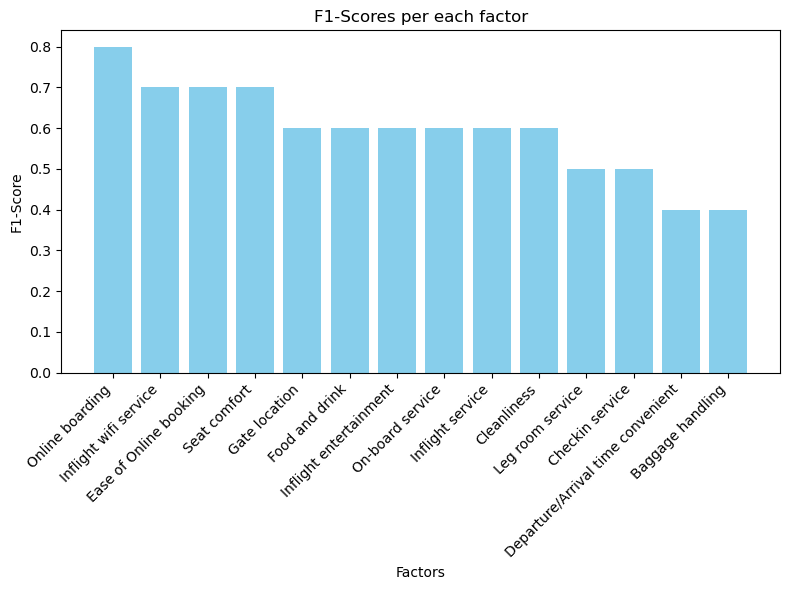


The factor with the maximum F1-Score is: Online boarding: 0.8


In [29]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading the dataset
# EDA, transformation and preparation was applied to the dataset 
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
data = pd.read_csv("Airline_Passenger_Satisfaction_Data_Set.csv")

# Select features and target to be analized
features = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",	"Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"
]
target = ["satisfaction"]

# Create a dictionary to store the model performance for each feature
feature_performance = {}

# looping through the features to find the F1-Scores
for feature in features:
    # Split into feature and target sets
    X = data[feature].values
    y = data[target].values

    # Reshaping X 'numpy.ndarray' class from a single feature
    X = X.reshape(-1, 1)

    # Reshaping of y to (n_samples, )
    y = np.ravel(y) 

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    )

    # Scaling the data
    # As part of EDA, features selected show similar values between 0-5 and target shows balanced output almost 50%-50%.
    # Based on this findings next code section wouldn't be necessary.
    #scaler = StandardScaler()
    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    # Training a KNN model for each feature
    knn_mod = KNeighborsClassifier(n_neighbors=9)
    knn_mod.fit(X_train, y_train)  
    y_pred = knn_mod.predict(X_test)
    
    # Calculating F1-Score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature_F1-Score pairs to the dictionary
    feature_performance[feature] = round(f1,1)


# Printing all F1-Scores
sorted_items = sorted(feature_performance.items(), key=lambda item: item[1], reverse=True)
sorted_feature_performance = dict(sorted_items)
print("F1-Scores per each factor are:\n")
for label, value in sorted_feature_performance.items(): print(f"F1-score for {label}: {value}")

# Visualizing all F1-Scores
labels = sorted_feature_performance.keys()
values = sorted_feature_performance.values()
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Factors')
plt.ylabel('F1-Score')
plt.title('F1-Scores per each factor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Getting and Printing the maximum F1-Score
max_key = max(feature_performance, key=feature_performance.get)
max_value = feature_performance[max_key]
print(f"\nThe factor with the maximum F1-Score is: {max_key}: {max_value}")
